# A notebook to test the Benford Class plotting with different datasets


### PROGRAMMER:    Rafael Mata M.
### DATE CREATED:  24 Nov 2020                                
### REVISED DATE:  24 Nov 2020
### PURPOSE: A Jupyter Notebook to test the Benford Class plots

In [9]:
# Import libraries
import pandas as pd
import numpy as np
from benford import Benford
import matplotlib.pyplot as plt
from PIL import Image

## Import a World population Dataset for 2020, analyze with Benford and Plot the digits probability of occurrence

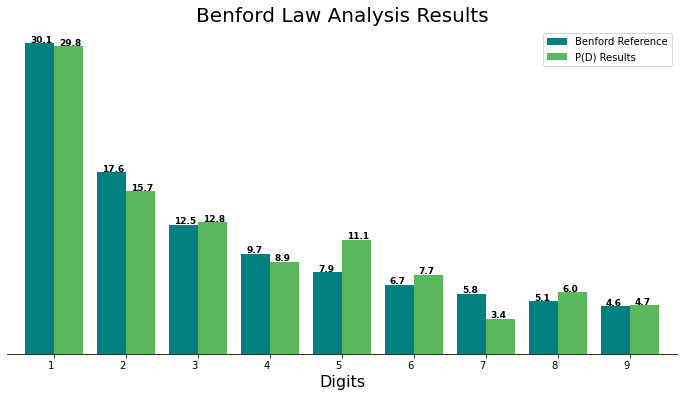

In [10]:
benford_population = Benford()
path = 'population.csv'
benford_population.load_dataset(path)
benford_population.benford_analysis()
benford_population.plot()

### In the grah above is clear that the world population for each country follows the Benford´s lAW

## Read an image and analyze the color pixels levels to see if its follow the Benford´s Law

In [22]:
image_file = 'flower.jpg'
image = Benford()
image.load_image(image_file)

Image read


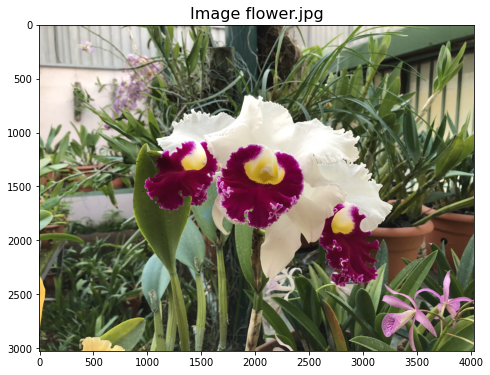

In [23]:
fig, ax = plt.subplots(nrows=1, ncols= 1,figsize=[12, 6])
ax.imshow(image.dataset)
ax.set_title('Image '+image_file,fontsize=16);

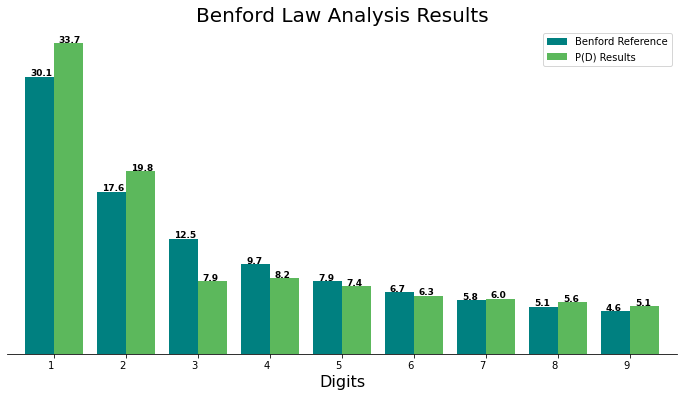

In [24]:
image.benford_analysis()
image.plot()

### In the graph above, the pixels colors levels in most of the digits comply the Benford´s Law when is a natural and not modified image

## Read an online [dataset]('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv') repository containning the COVID-19 Accumulated daily reports


In [26]:
dataset = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',index_col=0)

### Clean the dataset dropping the columns not needed like lat and long

In [27]:
columna = dataset.columns  
dataset.set_index(columna[0], inplace=True)  # Para regenerar el indice por pais
dataset.drop(['Lat', 'Long'], axis=1, inplace=True)

### Functions to calculate the daily values from the dialy accumulated values

In [28]:
def get_daily_values(dataset):
    '''
    From the accumulated Dataset this function calculate the daily values
      
    Args:
       
        dataset : dataset with the accumulated cases
       
    Returns:
         daily_dataset: data frame with the daily values
    '''
    columns = dataset.columns
    daily_value = np.empty(len(dataset)) # create a temporary numpy array to store the daily values 
    daily_dataset = pd.DataFrame(index=dataset.index)
    for country in columns: 
        country_data = dataset[country] 
        for i in range(len(country_data)-1): 
            daily_value[-i-1] = country_data[-i-1] - country_data[-i-2] 
            daily_value[0] = country_data[0] 
        daily_dataset[country] = daily_value
    
    return daily_dataset

In [29]:
def columns_dataset_to_timestamp(dataset):
    '''
    From the Dataset this function take the columns in string format and conver to timestamp 
    
      
    Args:
        dataset : pandas datarframe dataset with string date format columns
       
    Returns:
         datset: with columns in timestamp format
    '''

    columns = list(dataset.columns)
    dataset.columns = pd.to_datetime(columns)

    return dataset

### Summarize the data by Country, convert the dates columns to timestamp and calculate the daily values

In [30]:
subdata = dataset.groupby('Country/Region', axis=0).sum()        #Sum the daily data by country
subdata = columns_dataset_to_timestamp(subdata) #Change the columns format date to timestamp
dataset = get_daily_values(subdata.T)

#### Analyze the Covid dataset using the Benford Class

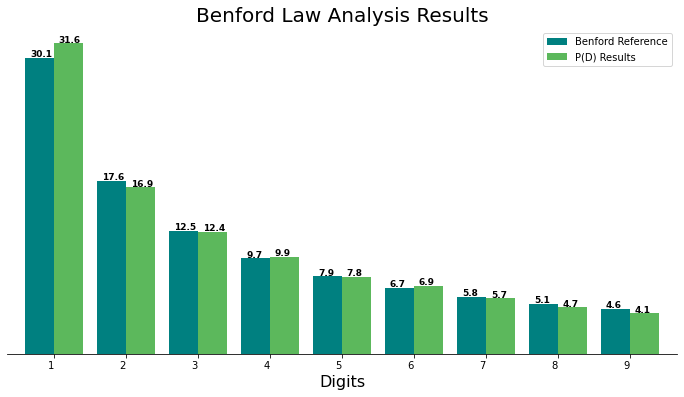

In [31]:
dataset = np.asarray(dataset)
ben_covid = Benford(dataset=dataset)
ben_covid.benford_analysis()
ben_covid.plot()

### The graph above also fulfill most of the digits probability according with Benford´s Law 